In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
water = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\basicDrinkingWaterServices.csv")

In [87]:
water.head(10)

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56
5,Afghanistan,2012,Population using at least basic drinking-water...,45.19
6,Afghanistan,2011,Population using at least basic drinking-water...,42.84
7,Afghanistan,2010,Population using at least basic drinking-water...,40.52
8,Afghanistan,2009,Population using at least basic drinking-water...,38.23
9,Afghanistan,2008,Population using at least basic drinking-water...,35.97


In [88]:
allCountries = water['Location'].unique().tolist()

In [89]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

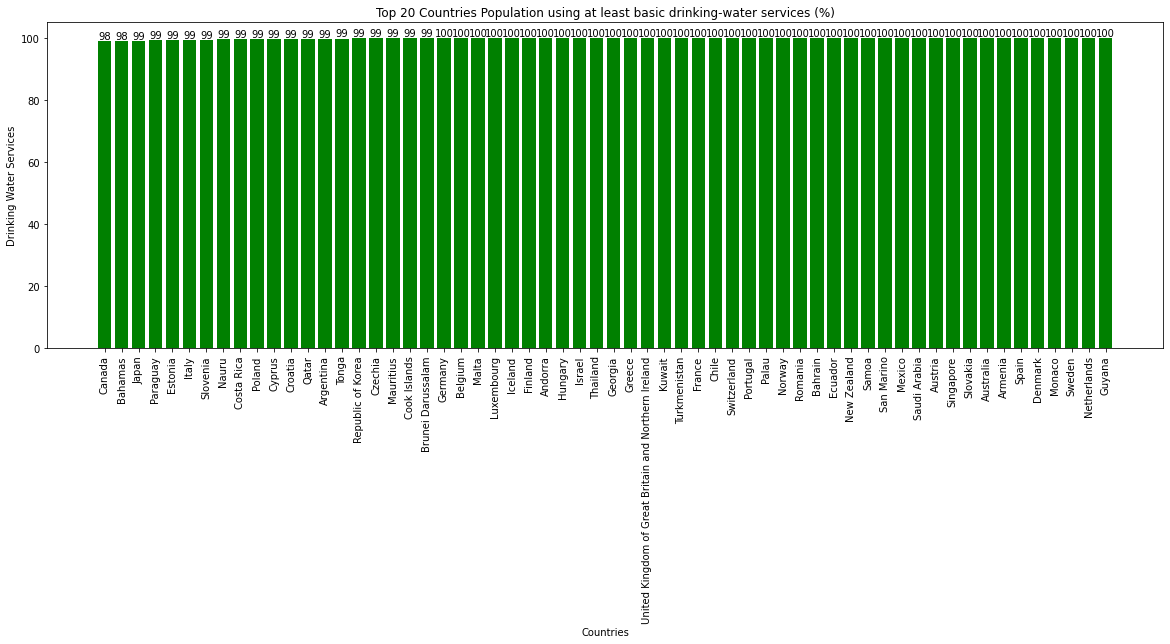

In [90]:
tempData = water[water['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-60:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "green")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Drinking Water Services")
plt.title("Top 20 Countries Population using at least basic drinking-water services (%)")
plt.show()

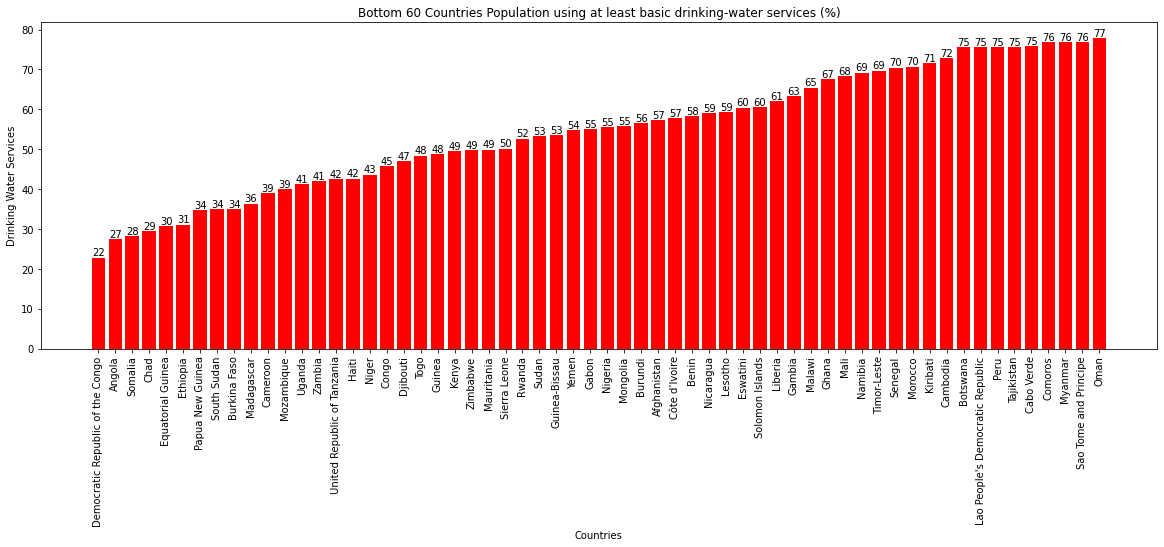

In [91]:
tempData = water[water['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:60]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "red")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Drinking Water Services")
plt.title("Bottom 60 Countries Population using at least basic drinking-water services (%)")
plt.show()

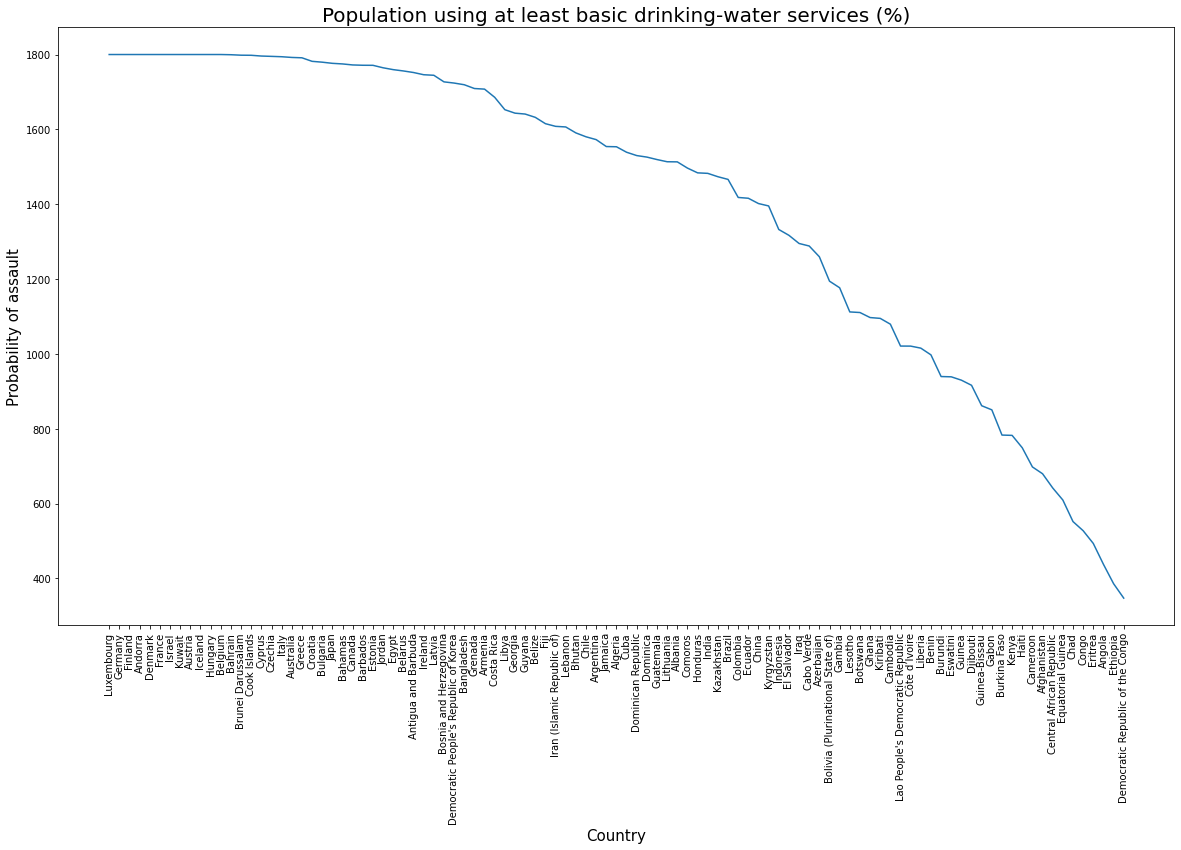

In [96]:
df = water[water['Location']=='Afghanistan']
water_sort = pd.DataFrame([])
water_sort0 = []
water_sort1 = []
index = []

for i in np.unique(water['Location'][:1800]):
    water_sort0.append(i)
    water_sort1.append(water['First Tooltip'][water['Location']==i].sum())
    index.append(list(water['Location'][water['Location']==i].index)[0])
    
water_sort['Name'] = water_sort0
water_sort['Value'] = water_sort1
water_sort.index = index
water_sort = water_sort.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(20, 11))
plt.plot(water_sort['Name'], water_sort['Value'])
plt.title('Population using at least basic drinking-water services (%)', size=20)
plt.xlabel('Country', size=15)
plt.ylabel('Probability of assault', size=15)
plt.xticks(rotation=90, size=10)
plt.show()

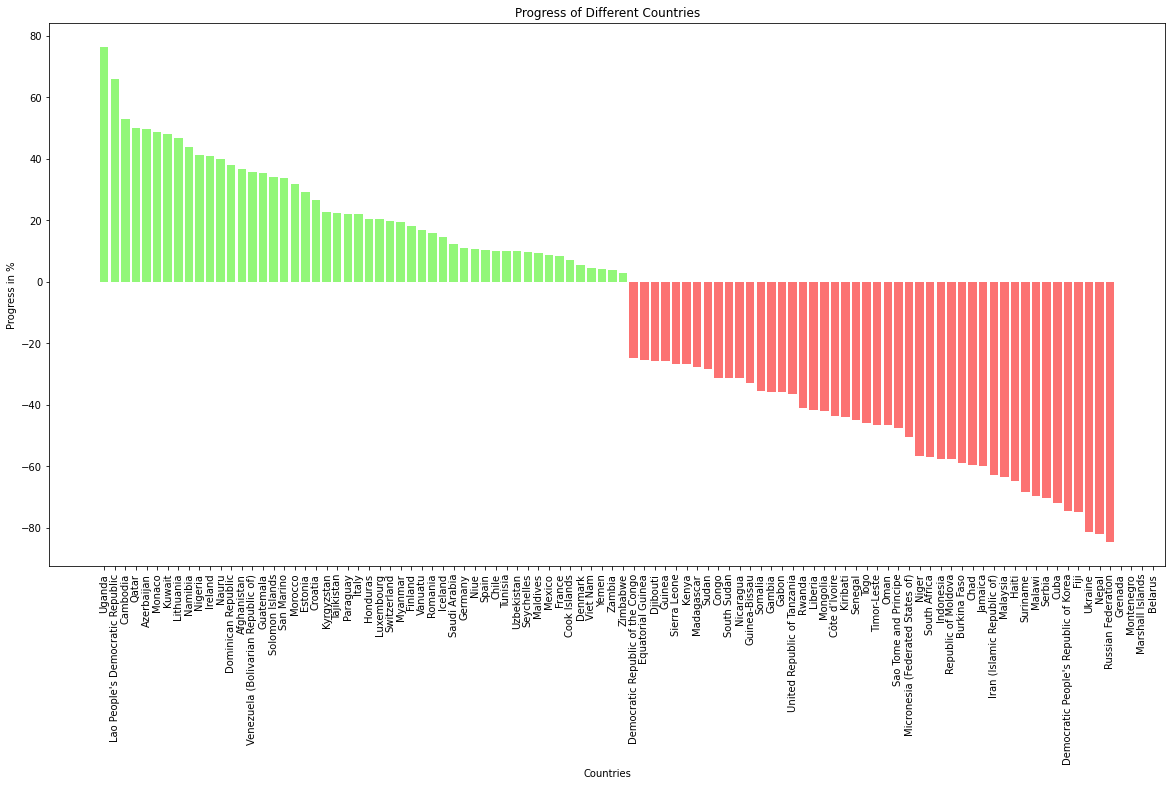

In [99]:

tempData2016 = water[water['Period'] == 2017]
tempData2000 = water[water['Period'] == 2000]
tempData2016.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2016.join(tempData2000, lsuffix='_16', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_16']
tempData = tempData[['Location_16', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[-50:]
tempDataBot = tempData[:50]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_16'], tempDataBot['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_16'], tempDataTop['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress in %")
plt.title("Progress of Different Countries")
plt.show()
